# **IMPORTING LIBRARIES AND LOADING DATASET**

**IMPORTING LIBRARIES**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

**LOADING DATASET**

In [22]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [37]:

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
print("Dypes:",train_data.dtypes)
print("Columns:",train_data.columns)

Dypes: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


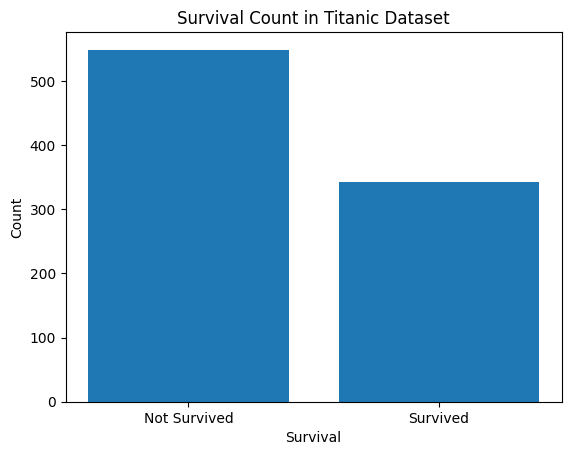

Number of who did not survive: 549
Number of survived: 342


In [26]:
survived_count = train_data['Survived'].value_counts()

# Defining Categories
categories = ['Not Survived', 'Survived']
values = [survived_count[0], survived_count[1]]

# Creating Bar plot
plt.bar(categories, values)

plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()

print(f"Number of who did not survive: {survived_count[0]}")
print(f"Number of survived: {survived_count[1]}")

# **EXPLORATORY DATA ANALYSIS**

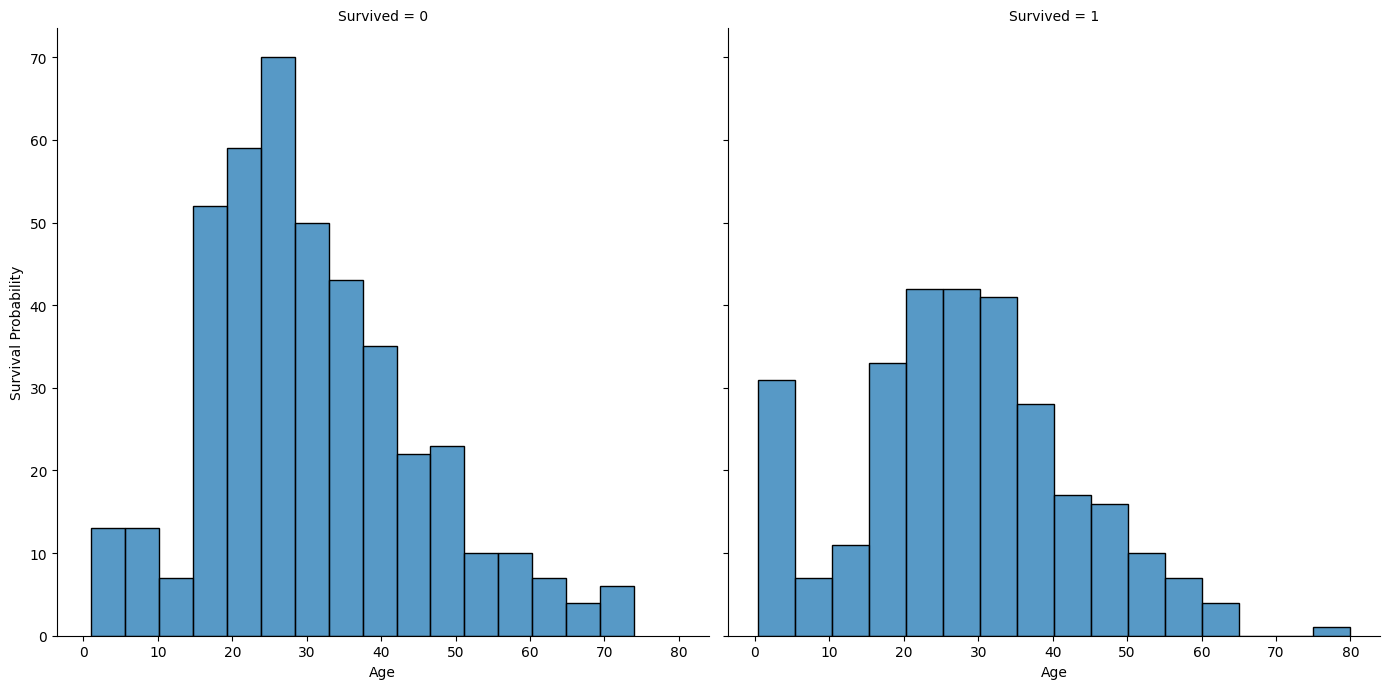

In [29]:
age = sns.FacetGrid(train_data, col="Survived", height = 7)
age = age.map(sns.histplot, "Age")
age = age.set_ylabels("Survival Probability")

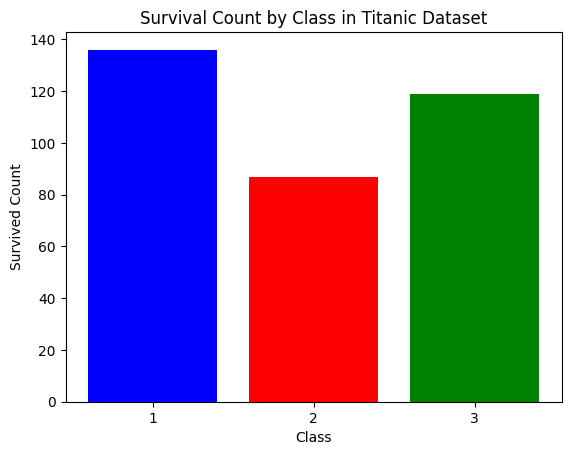

Number of Survived in first Class: 136
Number of Survived in second Class: 87
Number of Survived in third Class: 119


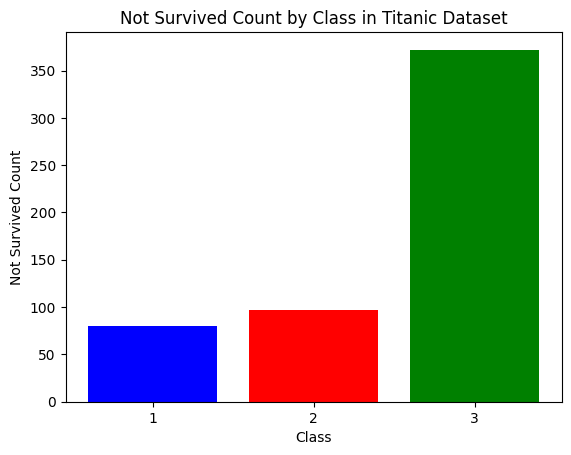

Number of Not Survived in first Class: 80
Number of Not Survived in second Class: 97
Number of Not Survived in third Class: 372


In [33]:
survived_count = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()

not_survived_count = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()

categories = ['1', '2', '3']

#Shows count of survivors for each passenger class, assigning a default value of 0 if there are no survivors in that class.
values = [survived_count[1], survived_count[2], survived_count[3]]

not_survived_values = [not_survived_count[1], not_survived_count[2], not_survived_count[3]]

plt.bar(categories, values, color=['blue', 'red', 'green'])

plt.xlabel('Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Survived in first Class: {values[0]}")
print(f"Number of Survived in second Class: {values[1]}")
print(f"Number of Survived in third Class: {values[2]}")

plt.bar(categories, not_survived_values, color=['blue', 'red', 'green'])

plt.xlabel('Class')
plt.ylabel('Not Survived Count')
plt.title('Not Survived Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Not Survived in first Class: {not_survived_values[0]}")
print(f"Number of Not Survived in second Class: {not_survived_values[1]}")
print(f"Number of Not Survived in third Class: {not_survived_values[2]}")

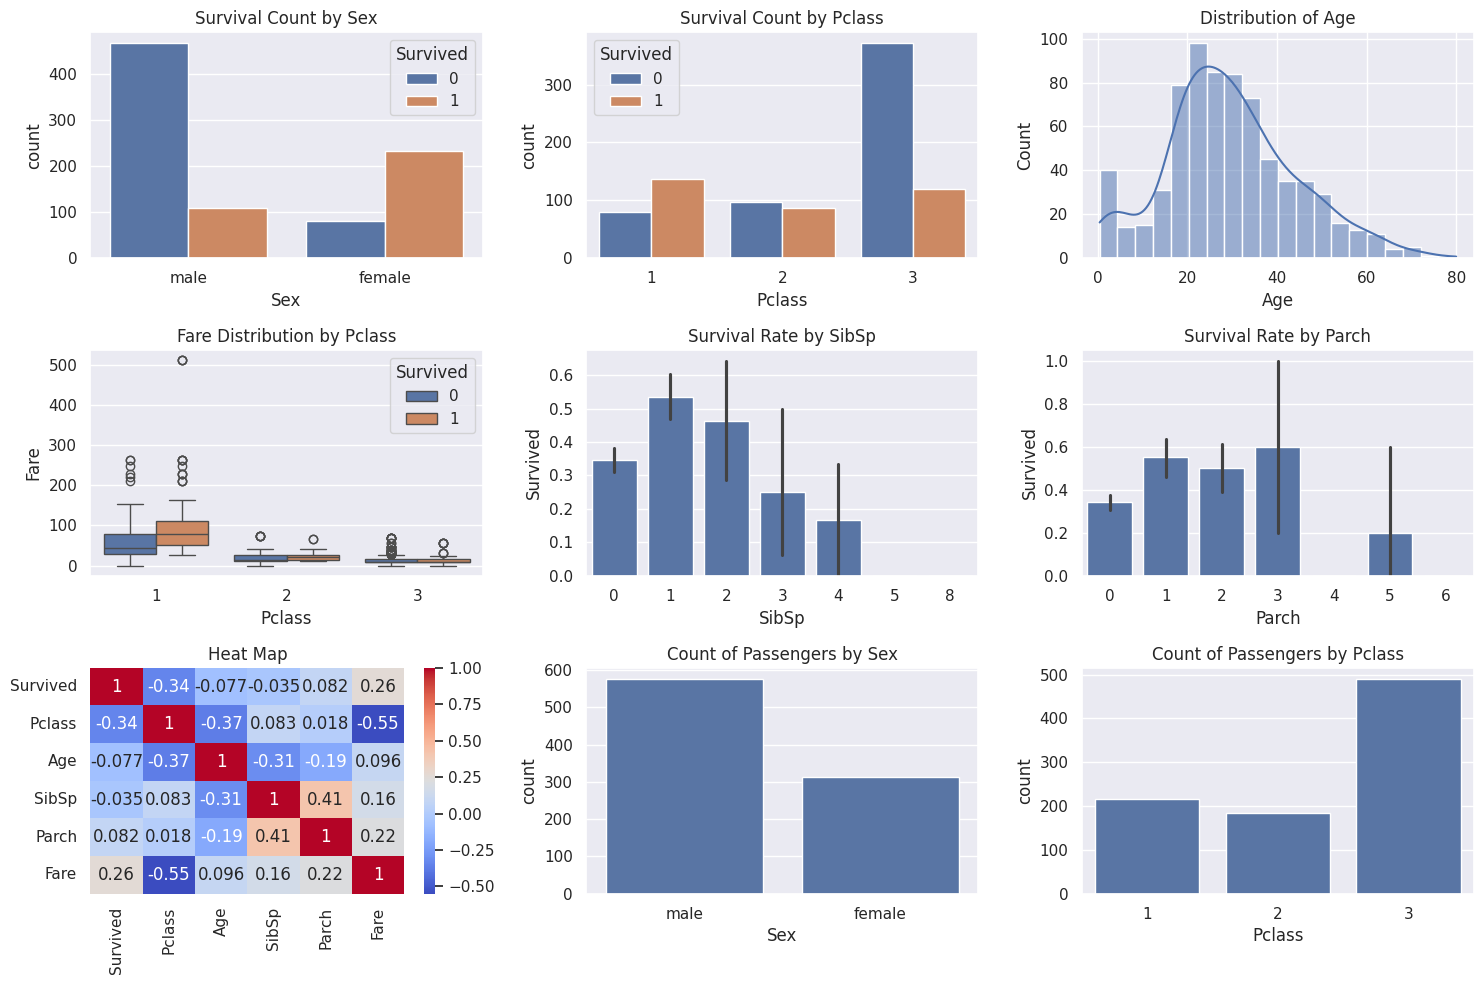

In [35]:
plt.figure(figsize=(15, 10))

# 1. Sex by Survived
plt.subplot(3, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Sex')

# 2. Pclass by Survived
plt.subplot(3, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Pclass')

# 3. Age Distribution
plt.subplot(3, 3, 3)
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# 4. Pclass by Fare
plt.subplot(3, 3, 4)
sns.boxplot(x='Pclass', y='Fare', data=train_data, hue='Survived')
plt.title('Fare Distribution by Pclass')

# 5. SibSp by Survived
plt.subplot(3, 3, 5)
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.title('Survival Rate by SibSp')

# 6. Parch by Survived
plt.subplot(3, 3, 6)
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title('Survival Rate by Parch')

# 7. Heatmap
plt.subplot(3, 3, 7)
corr_matrix = train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')

# 8. Sex
plt.subplot(3, 3, 8)
sns.countplot(x='Sex', data=train_data)
plt.title('Count of Passengers by Sex')

# 9. Pclass
plt.subplot(3, 3, 9)
sns.countplot(x='Pclass', data=train_data)
plt.title('Count of Passengers by Pclass')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


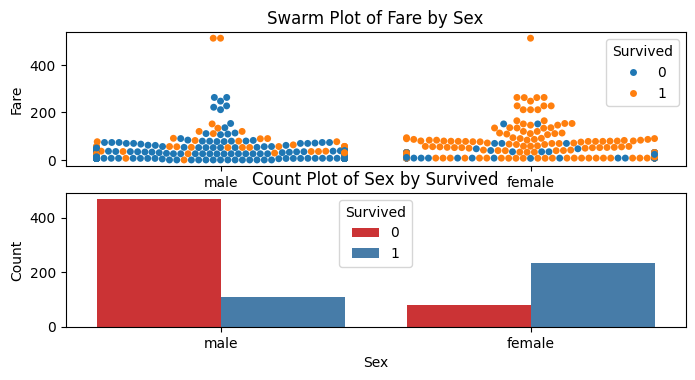

In [32]:
plt.figure(figsize=(8, 8))

# 1. Sex by Fare
plt.subplot(4, 1, 1)
sns.swarmplot(x='Sex', y='Fare', data=train_data, hue='Survived')
plt.title('Swarm Plot of Fare by Sex')

# 2. Sex by Survived

plt.subplot(4, 1, 2)
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set1')

plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot of Sex by Survived')


plt.show()